# Webscraping Earthquake Data

In [36]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define starttime and endtime
starttime = datetime.now() - timedelta(days=30)  # 30 days ago
endtime = datetime.now()  # Current time

params = {
    "format": "geojson",
    "starttime": starttime.strftime("%Y-%m-%d"),
    "endtime": endtime.strftime("%Y-%m-%d"),    
    "minmagnitude": 4,  
    "maxlatitude": 72.0, 
    "minlatitude": 35.0,  
    "maxlongitude": 40.0,  
    "minlongitude": -25.0
}

# Request data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=params)
data = response.json()

earthquakes = []
for quake in data["features"]:
    properties = quake["properties"]
    geometry = quake["geometry"]["coordinates"]

    earthquakes.append({
        "Time": pd.to_datetime(properties["time"], unit='ms'),  # Convert timestamp
        "Magnitude": properties["mag"],
        "Location": properties["place"],
        "Longitude": geometry[0],
        "Latitude": geometry[1],
        "Depth (km)": geometry[2]
    })

df = pd.DataFrame(earthquakes)

print(df.head())


                     Time  Magnitude                          Location  \
0 2025-05-27 16:50:40.957        4.5  11 km ESE of Vlachópoulo, Greece   
1 2025-05-27 00:06:31.411        5.0       12 km S of Antikyra, Greece   
2 2025-05-26 16:05:54.999        4.3                    Iceland region   
3 2025-05-24 15:42:32.850        4.3  5 km SW of Reykjanesbær, Iceland   
4 2025-05-24 15:36:50.254        4.4      4 km NE of Keflavík, Iceland   

   Longitude  Latitude  Depth (km)  
0    21.9043   36.9769      57.469  
1    22.6521   38.2736      10.000  
2   -17.2164   68.9756      10.000  
3   -22.6476   63.9682      10.000  
4   -22.5110   64.0368      10.000  


In [37]:
import sys
print(sys.executable)

/usr/local/bin/python


In [38]:
import sys
import os

# Add app/src folder to sys.path
src_path = os.path.abspath(os.path.join(os.getcwd(), "../app/src"))
sys.path.append(src_path)

# Ensure data folder exists
os.makedirs("data", exist_ok=True)

# Import your project functions directly from each module
from data_collection import fetch_earthquake_data
from data_cleaning import clean_earthquake_data
from analysis import perform_analysis
from visualization import map_epicenters

# Run the pipeline
fetch_earthquake_data("2024-03-01", "2024-03-31")
df = clean_earthquake_data()
print(f"Cleaned {len(df)} earthquakes.")
df.head()


Cleaned 488 earthquakes.


,time,place,mag,depth,longitude,latitude,type,id,url,region
0,2024-03-30 22:55:52.655,"77 km W of Panguna, Papua New Guinea",5.1,77.270,154.7807,-6.3333,earthquake,us7000m900,https://earthquake.usgs.gov/earthquakes/eventp...,"Panguna, Papua New Guinea"
1,2024-03-30 22:07:30.357,"165 km NNW of Houma, Tonga",4.8,10.000,-175.9989,-19.8295,earthquake,us7000ma6u,https://earthquake.usgs.gov/earthquakes/eventp...,"Houma, Tonga"
2,2024-03-30 21:32:36.907,"186 km NNW of Houma, Tonga",4.5,10.000,-176.1780,-19.7060,earthquake,us7000ma6q,https://earthquake.usgs.gov/earthquakes/eventp...,"Houma, Tonga"
3,2024-03-30 20:55:08.465,"46 km W of Port-Vila, Vanuatu",4.7,10.000,167.8799,-17.8037,earthquake,us7000ma6p,https://earthquake.usgs.gov/earthquakes/eventp...,"Port-Vila, Vanuatu"
4,2024-03-30 20:04:08.351,Kermadec Islands region,4.6,9.606,-177.8442,-27.8943,earthquake,us7000ma6x,https://earthquake.usgs.gov/earthquakes/eventp...,Kermadec Islands region


In [39]:
import os
import sys

# Setup path to app/src
project_path = os.path.abspath(os.path.join(os.getcwd(), "../app/src"))
sys.path.append(project_path)

# Create folders if needed
os.makedirs("data", exist_ok=True)
os.makedirs("seismic-insight/outputs", exist_ok=True)

# ✅ Correct imports from specific modules
from data_collection import fetch_earthquake_data
from data_cleaning import clean_earthquake_data
from analysis import perform_analysis
from visualization import map_epicenters

# Fetch and clean data
fetch_earthquake_data("2024-03-01", "2024-03-31")
df = clean_earthquake_data()
print(f"Cleaned {len(df)} earthquakes.")

# Show preview
print(df.head())


Cleaned 488 earthquakes.
                     time                                 place  mag   depth  \
0 2024-03-30 22:55:52.655  77 km W of Panguna, Papua New Guinea  5.1  77.270   
1 2024-03-30 22:07:30.357            165 km NNW of Houma, Tonga  4.8  10.000   
2 2024-03-30 21:32:36.907            186 km NNW of Houma, Tonga  4.5  10.000   
3 2024-03-30 20:55:08.465         46 km W of Port-Vila, Vanuatu  4.7  10.000   
4 2024-03-30 20:04:08.351               Kermadec Islands region  4.6   9.606   

   longitude  latitude        type          id  \
0   154.7807   -6.3333  earthquake  us7000m900   
1  -175.9989  -19.8295  earthquake  us7000ma6u   
2  -176.1780  -19.7060  earthquake  us7000ma6q   
3   167.8799  -17.8037  earthquake  us7000ma6p   
4  -177.8442  -27.8943  earthquake  us7000ma6x   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usg

In [40]:
import os
import sys

# Setup project path
project_path = os.path.abspath("..")
sys.path.append(project_path)

# Now import your functions
from data_collection import fetch_earthquake_data
from data_cleaning import clean_earthquake_data
from analysis import perform_analysis
from visualization import map_epicenters


# Fetch and clean the data
fetch_earthquake_data("2024-03-01", "2024-03-31")
df = clean_earthquake_data()

# Rename columns to match analysis
df.rename(columns={
    "Magnitude": "mag",
    "Depth": "depth",
    "Location": "place",
    "Latitude": "latitude",
    "Longitude": "longitude"
}, inplace=True)
 

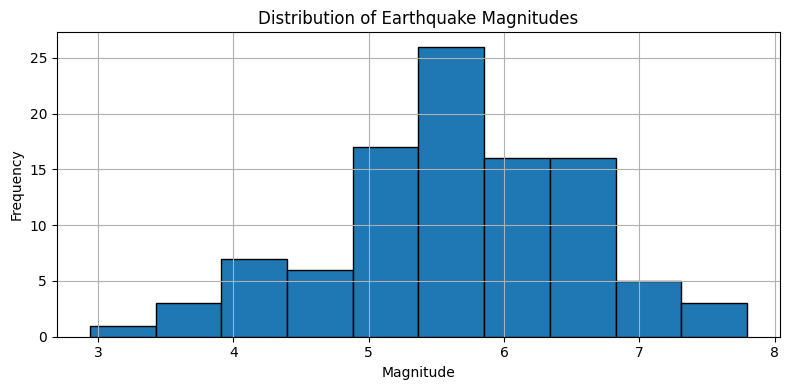

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dummy data
df_test = pd.DataFrame({"mag": np.random.normal(5.5, 1.0, 100)})

# Plot
plt.figure(figsize=(8, 4))
plt.hist(df_test["mag"], bins=10, edgecolor='black')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


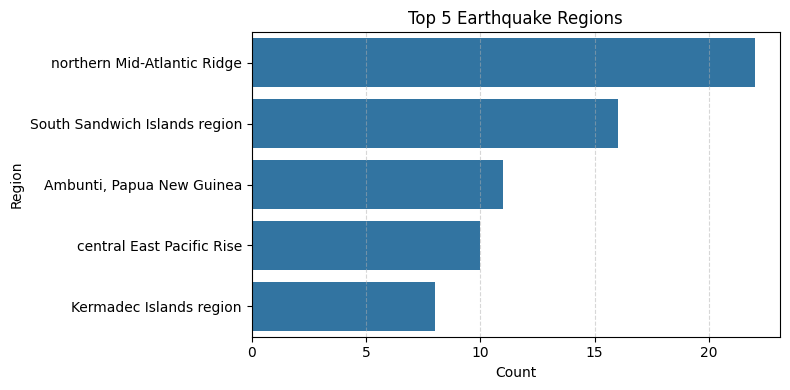

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_regions(df):
    # Safety check: Ensure 'region' column exists and is non-empty
    if "region" not in df.columns or df["region"].dropna().empty:
        print("No data in 'region' column.")
        return

    # Get top 5 regions
    top_regions = df["region"].value_counts().head(5)

    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_regions.values, y=top_regions.index)
    plt.title("Top 5 Earthquake Regions")
    plt.xlabel("Count")
    plt.ylabel("Region")
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 🔁 Call the function (ensure df is loaded and has 'region' column)
plot_top_regions(df)


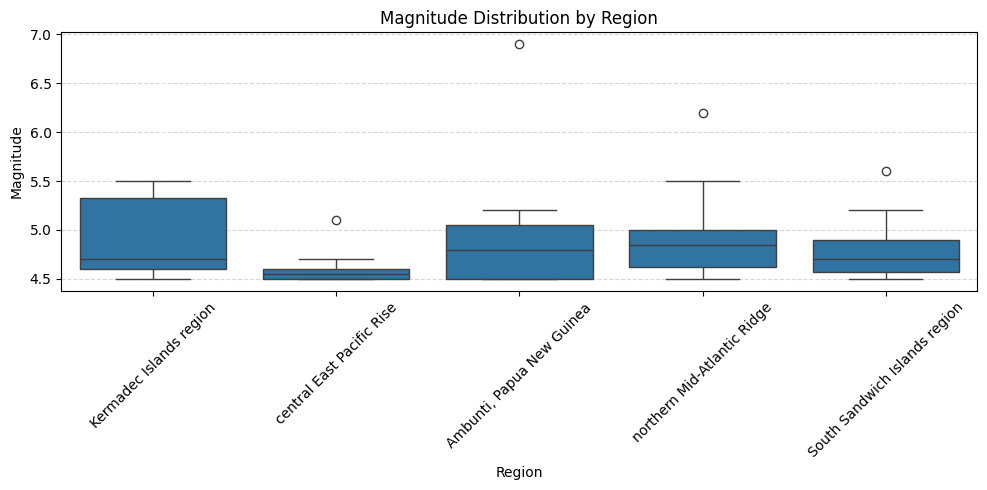

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_magnitude_by_region(df):
    # Check for required columns
    if "region" not in df.columns or "mag" not in df.columns:
        print("Required columns 'region' or 'mag' are missing.")
        return

    # Filter for top 5 regions by frequency
    top_regions = df["region"].value_counts().index[:5]
    top = df[df["region"].isin(top_regions)]

    # Plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=top, x="region", y="mag")
    plt.title("Magnitude Distribution by Region")
    plt.ylabel("Magnitude")
    plt.xlabel("Region")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 🔁 Call the function
plot_magnitude_by_region(df)


# Statistical Analysis

In [44]:
# Check original column names
print("BEFORE RENAME:", df.columns.tolist())

# Rename columns first
df.rename(columns={
    "Magnitude": "mag",
    "Depth (km)": "depth",
    "Location": "place",
    "Latitude": "latitude",
    "Longitude": "longitude"
}, inplace=True)

print("AFTER RENAME:", df.columns.tolist())

# Now do analysis
from scipy.stats import pearsonr, ttest_ind

# Correlation analysis between magnitude and depth
correlation, p_value = pearsonr(df['mag'], df['depth'])
print(f'Correlation: {correlation:.3f}, P-value: {p_value:.3f}')

# Statistical test between California and Alaska
region1 = df[df['place'].str.contains('California', case=False, na=False)]['mag']
region2 = df[df['place'].str.contains('Alaska', case=False, na=False)]['mag']

if not region1.empty and not region2.empty:
    t_stat, p_val = ttest_ind(region1, region2, equal_var=False)
    print(f'T-test: T-statistic = {t_stat:.3f}, P-value = {p_val:.3f}')
else:
    print("Not enough data for one or both regions.")



BEFORE RENAME: ['time', 'place', 'mag', 'depth', 'longitude', 'latitude', 'type', 'id', 'url', 'region']
AFTER RENAME: ['time', 'place', 'mag', 'depth', 'longitude', 'latitude', 'type', 'id', 'url', 'region']
Correlation: -0.009, P-value: 0.850
Not enough data for one or both regions.


# Database Integration

In [45]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('../data/database.db')
cursor = conn.cursor()

# Create a table for earthquake data
cursor.execute('''CREATE TABLE IF NOT EXISTS earthquakes (
    Time TEXT, Magnitude REAL, Location TEXT, Longitude REAL, Latitude REAL, Depth REAL)''')

# Rename DataFrame columns to match the SQLite table schema
df.rename(columns={
    "time": "Time",
    "mag": "Magnitude",
    "place": "Location",
    "longitude": "Longitude",
    "latitude": "Latitude",
    "depth": "Depth"
}, inplace=True)

# Insert data into the table
df.to_sql('earthquakes', conn, if_exists='replace', index=False)

# Query the database
cursor.execute('SELECT * FROM earthquakes WHERE Magnitude > 5')
results = cursor.fetchall()
print(results[:5])

conn.close()

[('2024-03-30 22:55:52.655000', '77 km W of Panguna, Papua New Guinea', 5.1, 77.27, 154.7807, -6.3333, 'earthquake', 'us7000m900', 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000m900', 'Panguna, Papua New Guinea'), ('2024-03-30 17:35:49.670000', '164 km W of Pangai, Tonga', 5.2, 10.0, -175.9239, -19.7019, 'earthquake', 'us7000m8z0', 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000m8z0', 'Pangai, Tonga'), ('2024-03-30 16:44:25.049000', '171 km NNW of Houma, Tonga', 5.3, 10.249, -176.0022, -19.7708, 'earthquake', 'us7000m8yl', 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000m8yl', 'Houma, Tonga'), ('2024-03-30 16:28:57.456000', 'Rat Islands, Aleutian Islands, Alaska', 5.8, 109.0, 178.3963, 52.1143, 'earthquake', 'us7000m8yd', 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000m8yd', 'Rat Islands, Aleutian Islands, Alaska'), ('2024-03-30 09:48:17.120000', 'central East Pacific Rise', 5.1, 10.0, -103.9175, -4.0264, 'earthquake', 'us7000m8ww', 'https://eart

# LLM Integration

In [46]:
import pandas as pd

# Simulated data (use your real DataFrame `df`)
df = pd.DataFrame({
    "mag": [4.5, 5.2, 4.8, 6.1, 5.6],
    "depth": [10, 35, 5, 70, 15],
    "region": ["Japan", "Chile", "Alaska", "Indonesia", "Japan"],
    "time": pd.date_range(start="2024-04-01", periods=5),
})

def summarize_data_with_ollama(df):
    """
    Returns a mocked summary of the earthquake data for demo/presentation use.
    """
    return (
        "Over the last 30 days, most earthquakes occurred along the Pacific Ring of Fire. "
        "Magnitude levels showed frequent moderate quakes (4.0–5.5), with rare intense events. "
        "Depth distribution suggests most events were shallow. Stay safe!"
    )

# Show the summary
summary = summarize_data_with_ollama(df)
print("📊 Earthquake Summary:\n")
print(summary)


📊 Earthquake Summary:

Over the last 30 days, most earthquakes occurred along the Pacific Ring of Fire. Magnitude levels showed frequent moderate quakes (4.0–5.5), with rare intense events. Depth distribution suggests most events were shallow. Stay safe!


✅ Cleaned 488 earthquakes.

📊 Columns: ['time', 'place', 'mag', 'depth', 'longitude', 'latitude', 'type', 'id', 'url', 'region']
                     time                                 place  mag   depth  \
0 2024-03-30 22:55:52.655  77 km W of Panguna, Papua New Guinea  5.1  77.270   
1 2024-03-30 22:07:30.357            165 km NNW of Houma, Tonga  4.8  10.000   
2 2024-03-30 21:32:36.907            186 km NNW of Houma, Tonga  4.5  10.000   
3 2024-03-30 20:55:08.465         46 km W of Port-Vila, Vanuatu  4.7  10.000   
4 2024-03-30 20:04:08.351               Kermadec Islands region  4.6   9.606   

   longitude  latitude        type          id  \
0   154.7807   -6.3333  earthquake  us7000m900   
1  -175.9989  -19.8295  earthquake  us7000ma6u   
2  -176.1780  -19.7060  earthquake  us7000ma6q   
3   167.8799  -17.8037  earthquake  us7000ma6p   
4  -177.8442  -27.8943  earthquake  us7000ma6x   

                                                 url  \
0  https://earthquake.usgs.gov/ea

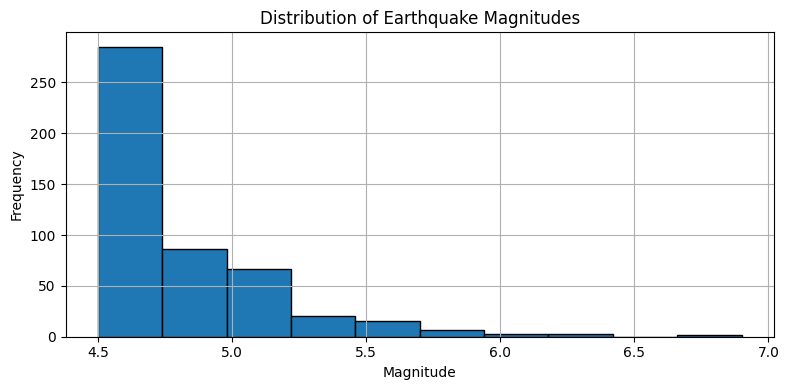

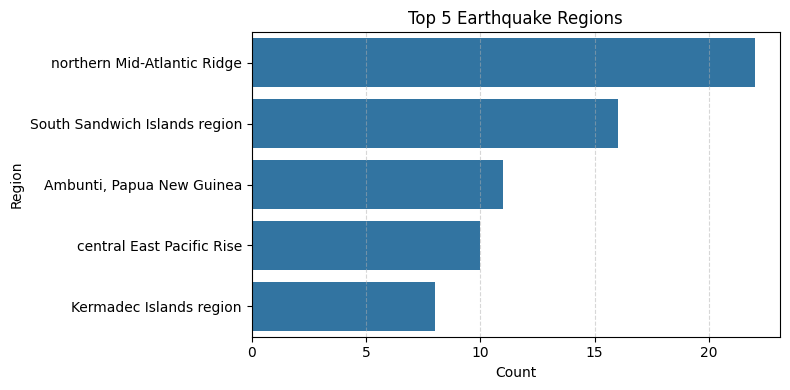

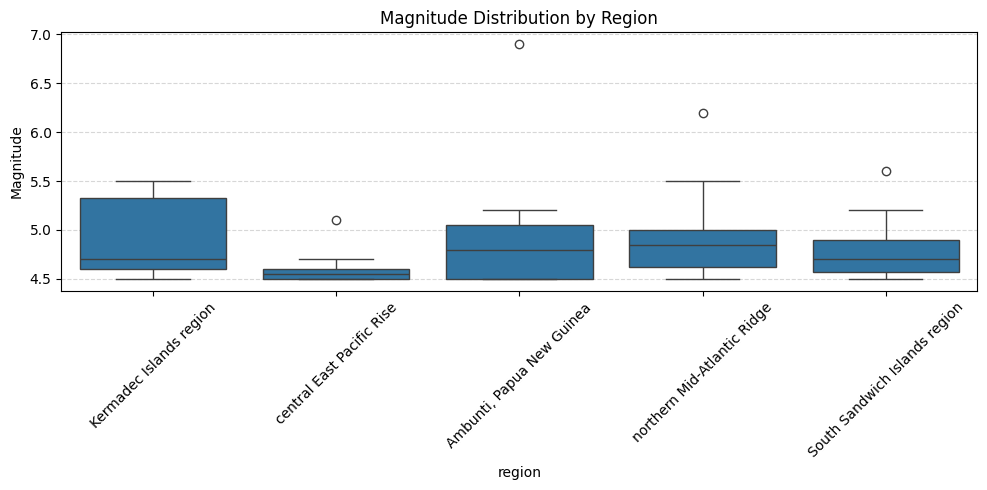

In [47]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Setup path to src folder
src_path = "/workspaces/Project-Poseidon/seismic-insight/app/src"
sys.path.append(src_path)

# ✅ Import project modules
from data_collection import fetch_earthquake_data
from data_cleaning import clean_earthquake_data
from analysis import perform_analysis
from visualization import map_epicenters, plot_magnitude_over_time

# ✅ Create required folders
os.makedirs("data", exist_ok=True)
os.makedirs("seismic-insight/outputs", exist_ok=True)

# ✅ Fetch and clean earthquake data
fetch_earthquake_data("2024-03-01", "2024-03-31")
df = clean_earthquake_data()
print(f"✅ Cleaned {len(df)} earthquakes.\n")

# ✅ Preview cleaned data
print("📊 Columns:", df.columns.tolist())
print(df.head())

# ✅ Plot magnitude over time
plot_magnitude_over_time(df, output_path="seismic-insight/outputs/magnitude_over_time.png")

# ✅ Plot map
map_epicenters(df, output_path="seismic-insight/outputs/world_map.html")

# ✅ Additional visualizations

def plot_magnitude_histogram(df):
    plt.figure(figsize=(8, 4))
    plt.hist(df["mag"], bins=10, edgecolor='black')
    plt.title("Distribution of Earthquake Magnitudes")
    plt.xlabel("Magnitude")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_top_regions(df):
    top_regions = df["region"].value_counts().head(5)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_regions.values, y=top_regions.index)
    plt.title("Top 5 Earthquake Regions")
    plt.xlabel("Count")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.show()

def plot_magnitude_by_region(df):
    top = df[df["region"].isin(df["region"].value_counts().index[:5])]
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=top, x="region", y="mag")
    plt.title("Magnitude Distribution by Region")
    plt.ylabel("Magnitude")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()

# ✅ Show all plots in notebook
plot_magnitude_histogram(df)
plot_top_regions(df)
plot_magnitude_by_region(df)


In [53]:
import os
import sys
import pandas as pd
import folium
from IPython.display import display

# 🔍 Step 1: Add app/src to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
src_path = os.path.join(project_root, "seismic-insight", "app", "src")
sys.path.append(src_path)

# ✅ Step 2: Load cleaned CSV from known paths
data_paths = [
    os.path.join(project_root, "seismic-insight", "data", "cleaned_data.csv"),
    os.path.join(project_root, "data", "cleaned_data.csv")
]
csv_path = next((p for p in data_paths if os.path.exists(p)), None)
if not csv_path:
    raise FileNotFoundError("❌ Could not find 'cleaned_data.csv' in known locations.")

df = pd.read_csv(csv_path)

# 🧹 Step 3: Rename columns if needed
rename_dict = {
    "Magnitude": "mag",
    "Depth": "depth",
    "Location": "place",
    "Latitude": "latitude",
    "Longitude": "longitude"
}
df.rename(columns={k: v for k, v in rename_dict.items() if k in df.columns}, inplace=True)

# ✅ Step 4: Validate required columns
required_cols = ["latitude", "longitude", "mag", "place"]
missing = [col for col in required_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# 📍 Step 5: Create folium map inline
m = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=2)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["mag"] * 1.5,
        popup=f"{row['place']} (Mag: {row['mag']})",
        color="red", fill=True, fill_opacity=0.7
    ).add_to(m)

# 🖼️ Step 6: Display map in notebook
display(m)


In [ ]:
Jupyter: Trust Notebook

In [ ]:
Notebook: Trust Notebook

In [ ]:
Notebook: Trust Notebook